In [1]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import math
import sympy
from sympy import diff
from sympy import symbols
from math import exp
from math import factorial
from math import cos
from math import pi
from math import log
from math import pow

In [2]:
total_cases = []
with open('owid-covid-data.csv') as csvfile:
    data = csv.reader(csvfile);
    for row in data:
        total_cases.append(int(row[3]))
        print('Date: ', row[2], '; Total cases: ', row[3])

Date:  2019-12-31 ; Total cases:  0
Date:  2020-01-01 ; Total cases:  0
Date:  2020-01-02 ; Total cases:  0
Date:  2020-01-03 ; Total cases:  0
Date:  2020-01-04 ; Total cases:  0
Date:  2020-01-05 ; Total cases:  0
Date:  2020-01-06 ; Total cases:  0
Date:  2020-01-07 ; Total cases:  0
Date:  2020-01-08 ; Total cases:  0
Date:  2020-01-09 ; Total cases:  0
Date:  2020-01-10 ; Total cases:  0
Date:  2020-01-11 ; Total cases:  0
Date:  2020-01-12 ; Total cases:  0
Date:  2020-01-13 ; Total cases:  0
Date:  2020-01-14 ; Total cases:  0
Date:  2020-01-15 ; Total cases:  0
Date:  2020-01-16 ; Total cases:  0
Date:  2020-01-17 ; Total cases:  0
Date:  2020-01-18 ; Total cases:  0
Date:  2020-01-19 ; Total cases:  0
Date:  2020-01-20 ; Total cases:  0
Date:  2020-01-21 ; Total cases:  0
Date:  2020-01-22 ; Total cases:  0
Date:  2020-01-23 ; Total cases:  0
Date:  2020-01-24 ; Total cases:  0
Date:  2020-01-25 ; Total cases:  0
Date:  2020-01-26 ; Total cases:  1
Date:  2020-01-27 ; Total ca

In [3]:
total_cases = np.array(total_cases)
total_cases1 = total_cases[27:len(total_cases)]
print(total_cases1)

t_array = np.arange(len(total_cases1))
print(t_array)


[    1     2     3     3     3     4     4     4     4     5     5     7
     7     7     7     7     7     7     7     8     8     8     8     8
     8     9     9     9     9    11    11    12    14    16    20    24
    27    30    33    45    51    57    62    77    93   103   138   176
   244   304   424   569   690   846   971  1302  1430  1646  1959  3385
  4018  4675  5386  6255  7424  8536  9595 11268 12519 13882 15496 16653
 17883 19274 20748 22133 23301 24365 25663 27046 28364 30081 31872 33341
 34777 36823 38413]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


431462*X - 54263.824608219208
[0.125767332020477]
0.12576733202047738


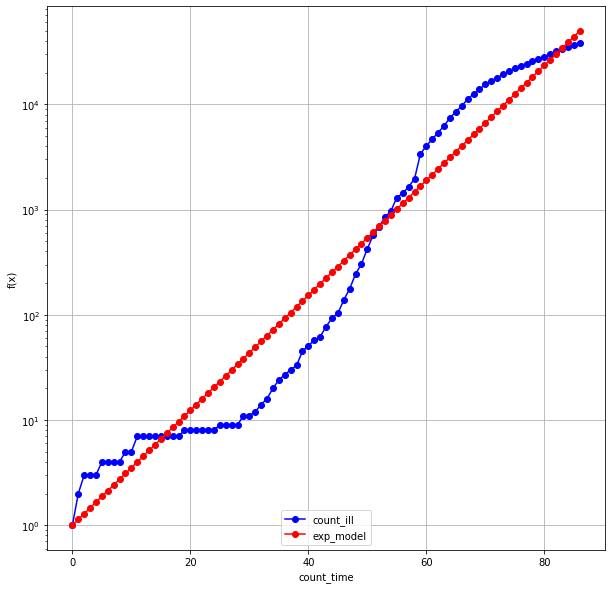

In [4]:
from sympy.solvers import solve
I0 = 1
S = ''
# X = 10
n = 87
X = symbols('X')
ylin = []
for i in range(n):
    ylin.append(log(total_cases1[i]) - log(I0))
    if i != n-1:
        S = S + ' ( ' + str(ylin[i]) + ' - ' + 'X * ' + str(t_array[i]) +' )' + '**2' + ' +'
    else:
        S = S + ' ( ' + str(ylin[i]) + ' - ' + 'X * ' + str(t_array[i]) +' )' + '**2'
# print(S)

dif_s = diff(S, X)
print(dif_s)

print(solve(dif_s, X))
summ1 = 0
summ2 = 0
for p in range(n):
    summ1 = summ1 + t_array[p] * ylin[p]
    summ2 = summ2 + t_array[p]**2
X = summ1 / summ2
print(X)

I = []
for i in range(n):
    I.append(I0 * np.exp(X*t_array[i]))

fig, ax = plt.subplots(figsize = (10, 10))
ax.semilogy(t_array, total_cases1, 'b', marker = 'o', label = "count_ill")
ax.semilogy(t_array, I, 'r', marker = 'o', label = "exp_model")
ax.legend(loc='lower center')
ax.set_xlabel('count_time')
ax.set_ylabel('f(x)')
ax.grid()
fig.savefig('gr_exp_model.jpg')
    



      fun: 43873326.91419326
 hess_inv: array([[1.40314226e-09, 5.28080253e-07],
       [5.28080253e-07, 1.67959629e-03]])
      jac: array([-21.,   0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 287
      nit: 5
     njev: 69
   status: 2
  success: False
        x: array([2.92044311e+00, 5.10543869e+04])


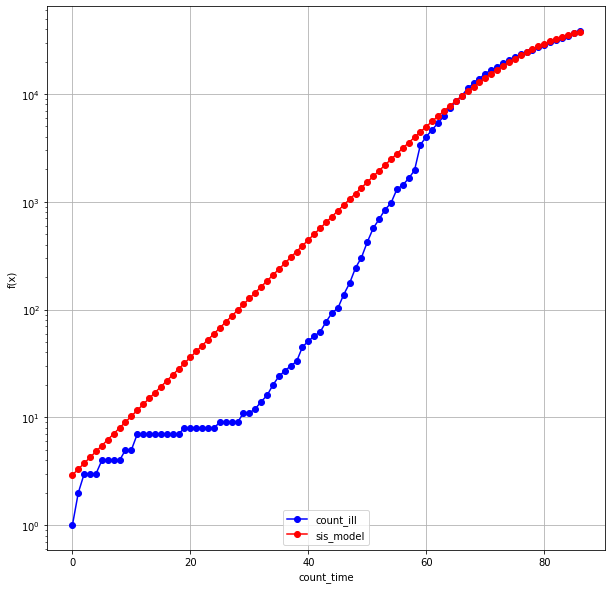

In [11]:
def sr_0(x0):
    I0 = x0[0]
    Iinf = x0[1]
    a = sum([(total_cases1[i] - Iinf / (1 + (Iinf/I0 - 1)*np.exp(-X*t_array[i])))**2 for i in range(n)])
    return a

from sympy import *
from scipy.optimize import minimize
n = 87
# Iinf = 0.0
x0 = [I0, Iinf]
res = minimize(sr_0, x0)
print(res)
I0 = 2.92045436
Iinf = 51054.3867

# Iinf = 68.672

I_sis = []
for i in range(n):
    I_sis.append(Iinf / ( 1 + ( Iinf/I0 - 1) * np.exp(-X*t_array[i])))
#     I_sis.append(1 / (7669.546 - 15313.93584 * np.exp(-X*t_array[i])))


fig, ax = plt.subplots(figsize = (10, 10))
ax.semilogy(t_array, total_cases1, 'b', marker = 'o', label = "count_ill")
ax.semilogy(t_array, I_sis, 'r', marker = 'o', label = "sis_model")
ax.legend(loc='lower center')
ax.set_xlabel('count_time')
ax.set_ylabel('f(x)')
ax.grid()
fig.savefig('gr_sis_model.jpg')

In [12]:
max_rasst = 0
for i in range (n):
    max_lebeg = abs(I_sis[i] - total_cases1[i])
    if max_lebeg > max_rasst:
        max_rasst = max_lebeg

norm1 = max_rasst
print(norm1)

max_rasst_otn = 0
for i in range (n):
    max_lebeg2 = abs((I_sis[i] - total_cases1[i])/total_cases1[i])
    if max_lebeg2 > max_rasst_otn:
        max_rasst_otn = max_lebeg2
print(max_rasst_otn)

2006.7194208053547
10.97544538085137


In [13]:
summ = 0
for i in range(n):
    summ += (I_sis[i] - total_cases[i])**2
abs_pogr = sqrt(summ/n)
print(abs_pogr)
summ2 = 0.0
for i in range(n):
    summ2 += (total_cases[i])**2
otn_pogr = abs_pogr / (sqrt(summ2/n))
print(otn_pogr)

11936.5406053140
22.4347881552113


Определим длительность эпидемии. Для этого найдем момент времени, когда число инфицированных в следующий день не выросло больше, чем на 1% относительно предыдущего дня.

In [15]:
Hi = 0.125767332
# II = 50000
# t = - log((Iinf/II - 1) / (Iinf/I0 - 1)) / Hi
# print(t)
m = 10000
I_s_inf = []
I_s_inf.append(I_sis[n-2])
I_s_inf.append(I_sis[n-1])
u = 1
while(I_s_inf[u] > 1.1 * I_s_inf[u-1]):
    u += u
    I_s_inf.append(Iinf / ( 1 + ( Iinf/I0 - 1) * np.exp(-X*u)))

print(u+n)

88
